# Atividade Prática: Modelagem de Conforto Térmico

**Aula 1 - Fundamentos de Lógica Fuzzy**

---

## Objetivo

Aplicar os conceitos aprendidos para modelar um sistema fuzzy que determine se uma temperatura está confortável considerando **temperatura** e **umidade**.

## O que você vai aprender

- Modelar múltiplas variáveis linguísticas
- Aplicar operações fuzzy para combinar variáveis
- Implementar regras de inferência fuzzy simples
- Interpretar resultados de sistemas fuzzy

## Tempo estimado

40-50 minutos

## 1. Setup do Ambiente

Vamos instalar a biblioteca **pyfuzzy-toolbox** do PyPI:

In [ ]:
# Instalar a biblioteca pyfuzzy-toolbox
!pip install pyfuzzy-toolbox -q

print("✓ pyfuzzy-toolbox instalado com sucesso!")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fuzzy_systems as fs
from fuzzy_systems.core import LinguisticVariable

# Configurar estilo dos gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Ambiente configurado com sucesso!")

✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✓ Ambiente configurado com sucesso!


## 2. Modelagem da Variável: TEMPERATURA

Vamos modelar a temperatura com três termos linguísticos usando `LinguisticVariable`:
- **FRIA**: 0-20°C
- **MORNA**: 15-29°C
- **QUENTE**: 26-40°C

✓ Variável TEMPERATURA modelada com sucesso!
   Termos: ['fria', 'morna', 'quente']


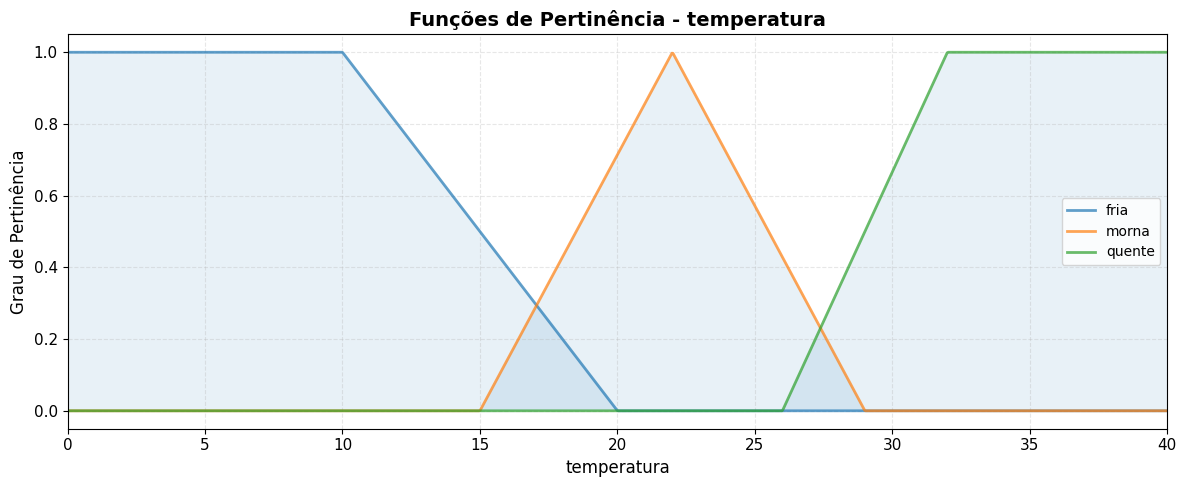

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': 'Funções de Pertinência - temperatura'}, xlabel='temperatura', ylabel='Grau de Pertinência'>)

In [2]:
# Criar variável linguística Temperatura
temperatura = LinguisticVariable(name="temperatura", universe=(0, 40))

# Adicionar termos linguísticos
temperatura.add_term("fria", "trapezoidal", (0, 0, 10, 20))
temperatura.add_term("morna", "triangular", (15, 22, 29))
temperatura.add_term("quente", "trapezoidal", (26, 32, 40, 40))

print("✓ Variável TEMPERATURA modelada com sucesso!")
print(f"   Termos: {list(temperatura.terms.keys())}")

# Visualizar
temperatura.plot(figsize=(12, 5), show=True)

## 3. Modelagem da Variável: UMIDADE

Agora vamos modelar a umidade com três termos linguísticos:
- **BAIXA**: 0-40%
- **NORMAL**: 30-70%
- **ALTA**: 60-100%

✓ Variável UMIDADE modelada com sucesso!
   Termos: ['baixa', 'normal', 'alta']


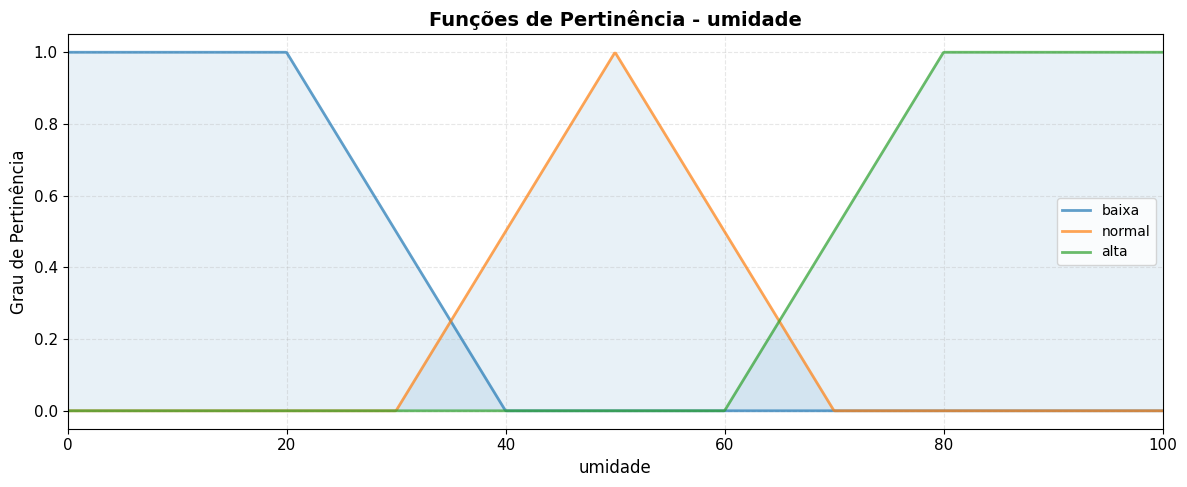

(<Figure size 1200x500 with 1 Axes>,
 <Axes: title={'center': 'Funções de Pertinência - umidade'}, xlabel='umidade', ylabel='Grau de Pertinência'>)

In [3]:
# Criar variável linguística Umidade
umidade = LinguisticVariable(name="umidade", universe=(0, 100))

# Adicionar termos linguísticos
umidade.add_term("baixa", "trapezoidal", (0, 0, 20, 40))
umidade.add_term("normal", "triangular", (30, 50, 70))
umidade.add_term("alta", "trapezoidal", (60, 80, 100, 100))

print("✓ Variável UMIDADE modelada com sucesso!")
print(f"   Termos: {list(umidade.terms.keys())}")

# Visualizar
umidade.plot(figsize=(12, 5), show=True)

## 4. Visualização Conjunta das Variáveis

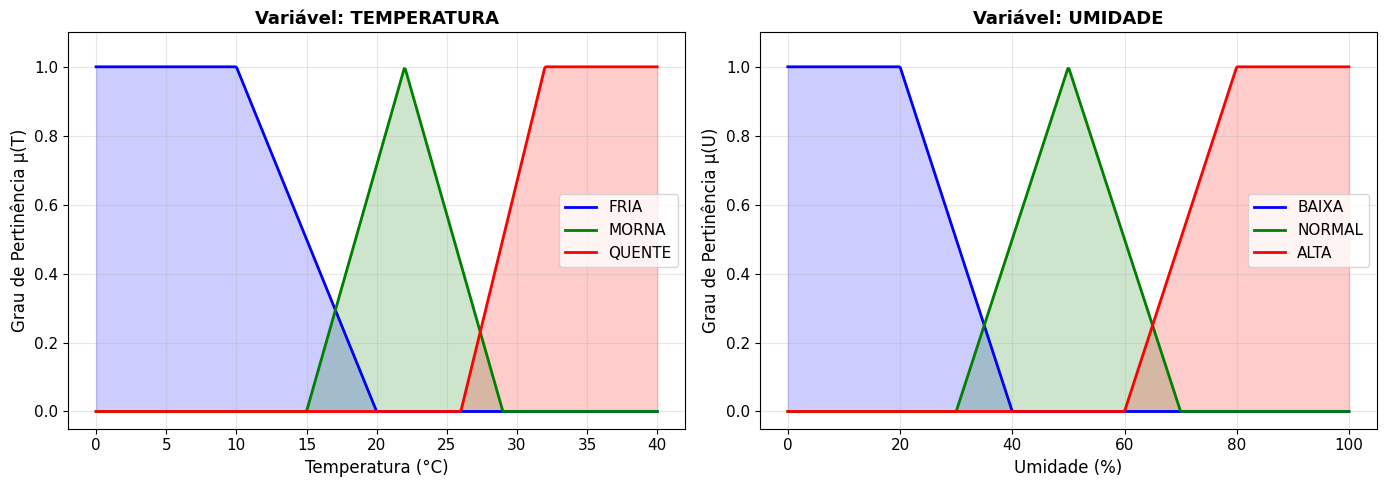

✓ Visualização conjunta completa!


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Temperatura
temp_x = np.linspace(0, 40, 500)
for nome, termo in temperatura.terms.items():
    mu = termo.membership(temp_x)
    color = {'fria': 'b', 'morna': 'g', 'quente': 'r'}[nome]
    ax1.plot(temp_x, mu, color=color, linewidth=2, label=nome.upper())
    ax1.fill_between(temp_x, 0, mu, alpha=0.2, color=color)

ax1.set_xlabel('Temperatura (°C)', fontsize=12)
ax1.set_ylabel('Grau de Pertinência μ(T)', fontsize=12)
ax1.set_title('Variável: TEMPERATURA', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([-0.05, 1.1])

# Umidade
umid_x = np.linspace(0, 100, 500)
for nome, termo in umidade.terms.items():
    mu = termo.membership(umid_x)
    color = {'baixa': 'b', 'normal': 'g', 'alta': 'r'}[nome]
    ax2.plot(umid_x, mu, color=color, linewidth=2, label=nome.upper())
    ax2.fill_between(umid_x, 0, mu, alpha=0.2, color=color)

ax2.set_xlabel('Umidade (%)', fontsize=12)
ax2.set_ylabel('Grau de Pertinência μ(U)', fontsize=12)
ax2.set_title('Variável: UMIDADE', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([-0.05, 1.1])

plt.tight_layout()
plt.show()

print("✓ Visualização conjunta completa!")

## 5. Sistema de Avaliação de Conforto Térmico

### Regras Fuzzy para Conforto

Vamos implementar regras simples para avaliar o conforto térmico:

**Conforto Ideal:**
- SE temperatura é MORNA E umidade é NORMAL

**Conforto Bom:**
- SE temperatura é MORNA E umidade é BAIXA
- OU SE temperatura é FRIA E umidade é NORMAL

**Desconforto:**
- SE temperatura é QUENTE E umidade é ALTA
- OU SE temperatura é FRIA E umidade é ALTA
- OU SE temperatura é QUENTE E umidade é BAIXA

In [5]:
def calcular_conforto(temp_valor, umid_valor):
    """
    Calcula o grau de conforto térmico para valores específicos
    de temperatura e umidade usando fuzzy_systems.
    
    Parâmetros:
        temp_valor: valor da temperatura em °C
        umid_valor: valor da umidade em %
    
    Retorna:
        Tupla com (pertinências_temp, pertinências_umid, conforto_ideal, conforto_bom, desconforto)
    """
    
    # Fuzzificar valores usando as variáveis linguísticas
    mu_temp = temperatura.fuzzify(temp_valor)
    mu_umid = umidade.fuzzify(umid_valor)
    
    # Aplicar regras de conforto usando operadores fuzzy
    # Regra 1: Conforto Ideal = Morna AND Normal
    conforto_ideal = min(mu_temp['morna'], mu_umid['normal'])
    
    # Regra 2: Conforto Bom = (Morna AND Baixa) OR (Fria AND Normal)
    conforto_bom = max(
        min(mu_temp['morna'], mu_umid['baixa']),
        min(mu_temp['fria'], mu_umid['normal'])
    )
    
    # Regra 3: Desconforto = (Quente AND Alta) OR (Fria AND Alta) OR (Quente AND Baixa)
    desconforto = max(
        max(
            min(mu_temp['quente'], mu_umid['alta']),
            min(mu_temp['fria'], mu_umid['alta'])
        ),
        min(mu_temp['quente'], mu_umid['baixa'])
    )
    
    return mu_temp, mu_umid, conforto_ideal, conforto_bom, desconforto


print("✓ Sistema de conforto térmico implementado usando fuzzy_systems!")

✓ Sistema de conforto térmico implementado usando fuzzy_systems!


## 6. Testando o Sistema com Casos Específicos

In [6]:
def testar_caso(temp_val, umid_val, descricao):
    """Testa um caso específico e exibe os resultados"""
    
    mu_temp, mu_umid, conf_ideal, conf_bom, desconf = calcular_conforto(temp_val, umid_val)
    
    print(f"\n{'='*70}")
    print(f"📊 Caso: {descricao}")
    print(f"   Temperatura: {temp_val}°C, Umidade: {umid_val}%")
    print(f"{'='*70}")
    
    print(f"\n   Pertinências TEMPERATURA:")
    print(f"      • Fria:   {mu_temp['fria']:.3f} ({mu_temp['fria']*100:.1f}%)")
    print(f"      • Morna:  {mu_temp['morna']:.3f} ({mu_temp['morna']*100:.1f}%)")
    print(f"      • Quente: {mu_temp['quente']:.3f} ({mu_temp['quente']*100:.1f}%)")
    
    print(f"\n   Pertinências UMIDADE:")
    print(f"      • Baixa:  {mu_umid['baixa']:.3f} ({mu_umid['baixa']*100:.1f}%)")
    print(f"      • Normal: {mu_umid['normal']:.3f} ({mu_umid['normal']*100:.1f}%)")
    print(f"      • Alta:   {mu_umid['alta']:.3f} ({mu_umid['alta']*100:.1f}%)")
    
    print(f"\n   Avaliação de CONFORTO (após aplicar as regras):")
    print(f"      • Conforto Ideal: {conf_ideal:.3f} ({conf_ideal*100:.1f}%)")
    print(f"      • Conforto Bom:   {conf_bom:.3f} ({conf_bom*100:.1f}%)")
    print(f"      • Desconforto:    {desconf:.3f} ({desconf*100:.1f}%)")
    
    # Determinar conclusão
    if conf_ideal > 0.7:
        conclusao = "✓ Muito confortável!"
        emoji = "😊"
    elif conf_ideal > 0.4:
        conclusao = "✓ Confortável"
        emoji = "🙂"
    elif conf_bom > 0.5:
        conclusao = "○ Aceitável"
        emoji = "😐"
    elif desconf > 0.6:
        conclusao = "✗ Desconfortável"
        emoji = "😣"
    else:
        conclusao = "○ Moderado"
        emoji = "😌"
    
    print(f"\n   {emoji} Conclusão: {conclusao}")
    print(f"{'='*70}\n")

In [7]:
# Testar vários casos
print("\n" + "="*70)
print("TESTANDO O SISTEMA DE CONFORTO TÉRMICO")
print("="*70)

testar_caso(22, 50, "Situação ideal")
testar_caso(18, 45, "Dia fresco e seco")
testar_caso(32, 75, "Dia quente e úmido")
testar_caso(25, 30, "Temperatura boa, ar seco")
testar_caso(28, 65, "Levemente quente e úmido")


TESTANDO O SISTEMA DE CONFORTO TÉRMICO

📊 Caso: Situação ideal
   Temperatura: 22°C, Umidade: 50%

   Pertinências TEMPERATURA:
      • Fria:   0.000 (0.0%)
      • Morna:  1.000 (100.0%)
      • Quente: 0.000 (0.0%)

   Pertinências UMIDADE:
      • Baixa:  0.000 (0.0%)
      • Normal: 1.000 (100.0%)
      • Alta:   0.000 (0.0%)

   Avaliação de CONFORTO (após aplicar as regras):
      • Conforto Ideal: 1.000 (100.0%)
      • Conforto Bom:   0.000 (0.0%)
      • Desconforto:    0.000 (0.0%)

   😊 Conclusão: ✓ Muito confortável!


📊 Caso: Dia fresco e seco
   Temperatura: 18°C, Umidade: 45%

   Pertinências TEMPERATURA:
      • Fria:   0.200 (20.0%)
      • Morna:  0.429 (42.9%)
      • Quente: 0.000 (0.0%)

   Pertinências UMIDADE:
      • Baixa:  0.000 (0.0%)
      • Normal: 0.750 (75.0%)
      • Alta:   0.000 (0.0%)

   Avaliação de CONFORTO (após aplicar as regras):
      • Conforto Ideal: 0.429 (42.9%)
      • Conforto Bom:   0.200 (20.0%)
      • Desconforto:    0.000 (0.0%)

  

## 7. Visualização: Mapa de Conforto Térmico

Vamos criar um mapa 2D que mostra as regiões de conforto para todas as combinações possíveis de temperatura e umidade.

Calculando mapa de conforto... ✓ Concluído!


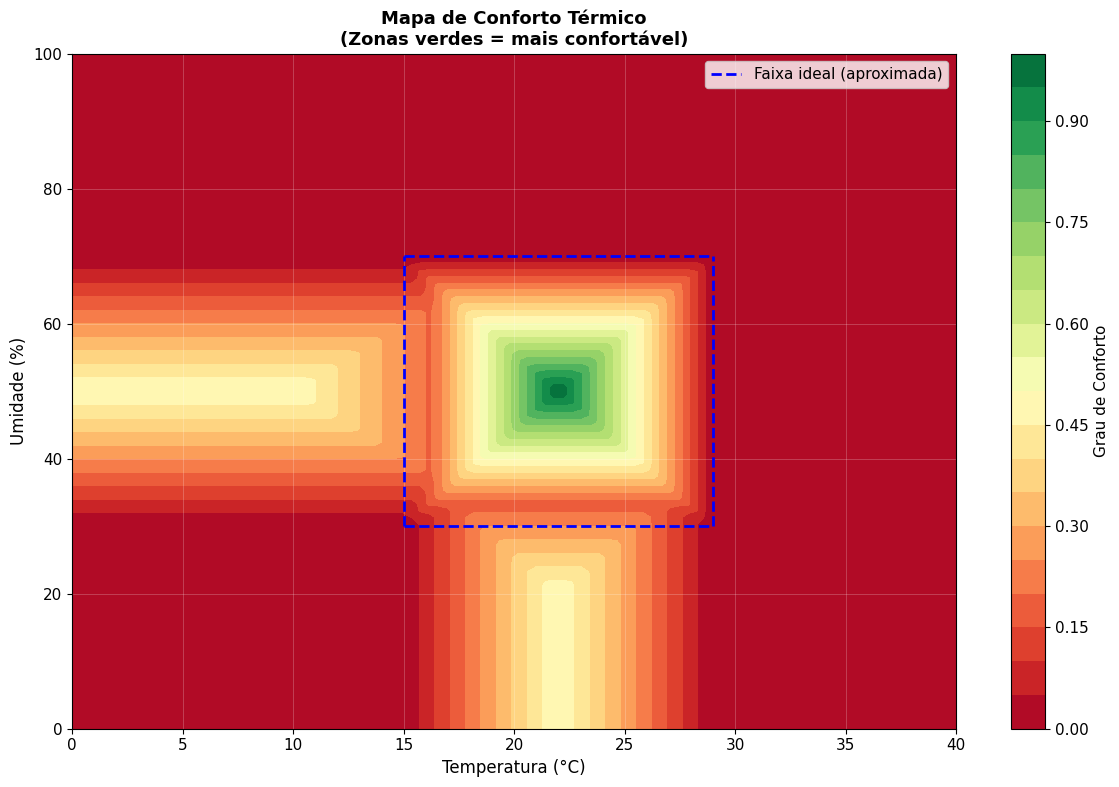


✓ Mapa de conforto criado com sucesso usando fuzzy_systems!


In [8]:
def criar_mapa_conforto():
    """Cria um mapa 2D mostrando regiões de conforto"""
    
    # Criar grade de valores
    temps = np.linspace(0, 40, 100)
    umids = np.linspace(0, 100, 100)
    
    conforto_map = np.zeros((len(umids), len(temps)))
    
    # Calcular conforto para cada combinação
    print("Calculando mapa de conforto... ", end="")
    for i, umid_val in enumerate(umids):
        for j, temp_val in enumerate(temps):
            _, _, conf_ideal, conf_bom, _ = calcular_conforto(temp_val, umid_val)
            # Conforto total = conforto ideal + 50% do conforto bom
            conforto_map[i, j] = max(conf_ideal, 0.5 * conf_bom)
    
    print("✓ Concluído!")
    
    # Plotar mapa
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(temps, umids, conforto_map, levels=20, cmap='RdYlGn')
    plt.colorbar(contour, label='Grau de Conforto')
    
    plt.xlabel('Temperatura (°C)', fontsize=12)
    plt.ylabel('Umidade (%)', fontsize=12)
    plt.title('Mapa de Conforto Térmico\n(Zonas verdes = mais confortável)',
              fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3, color='white', linewidth=0.5)
    
    # Marcar região ideal aproximada
    plt.plot([15, 29], [30, 30], 'b--', linewidth=2, label='Faixa ideal (aproximada)')
    plt.plot([15, 29], [70, 70], 'b--', linewidth=2)
    plt.plot([15, 15], [30, 70], 'b--', linewidth=2)
    plt.plot([29, 29], [30, 70], 'b--', linewidth=2)
    plt.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Mapa de conforto criado com sucesso usando fuzzy_systems!")


criar_mapa_conforto()

## 8. Exercício Prático para Você

Agora é sua vez! Complete os exercícios abaixo para praticar os conceitos aprendidos.

### Exercício 1: Teste com seus próprios valores

Modifique os valores abaixo e execute a célula para testar diferentes condições:

In [9]:
# TODO: Modifique estes valores para testar diferentes condições
minha_temperatura = 25  # °C
minha_umidade = 60      # %

testar_caso(minha_temperatura, minha_umidade, "Meu teste personalizado")


📊 Caso: Meu teste personalizado
   Temperatura: 25°C, Umidade: 60%

   Pertinências TEMPERATURA:
      • Fria:   0.000 (0.0%)
      • Morna:  0.571 (57.1%)
      • Quente: 0.000 (0.0%)

   Pertinências UMIDADE:
      • Baixa:  0.000 (0.0%)
      • Normal: 0.500 (50.0%)
      • Alta:   0.000 (0.0%)

   Avaliação de CONFORTO (após aplicar as regras):
      • Conforto Ideal: 0.500 (50.0%)
      • Conforto Bom:   0.000 (0.0%)
      • Desconforto:    0.000 (0.0%)

   🙂 Conclusão: ✓ Confortável



### Exercício 2: Modificar as Funções de Pertinência

Tente modificar os parâmetros das funções de pertinência para criar sua própria definição de conforto térmico:

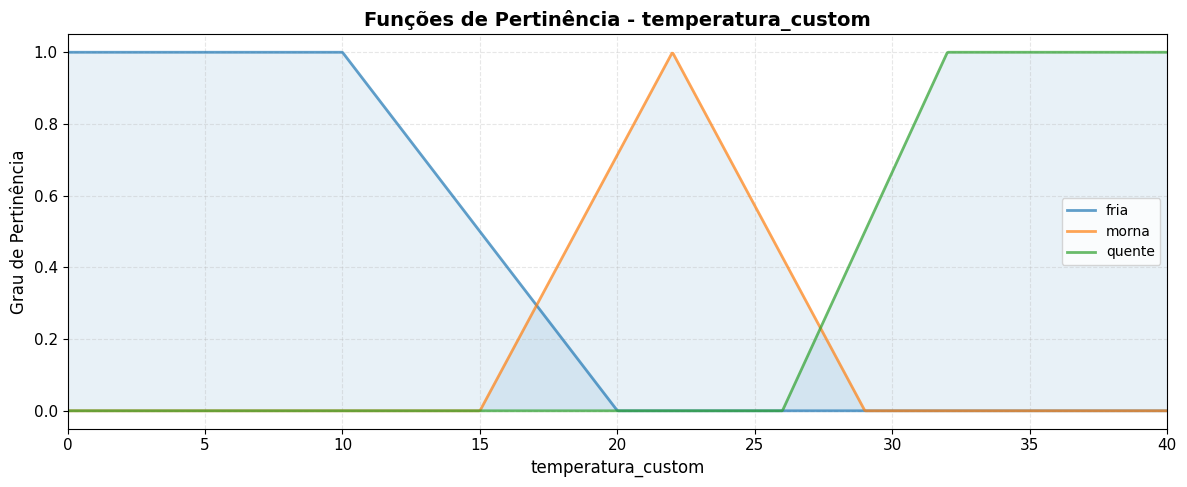


✓ Modelagem personalizada criada usando fuzzy_systems!


In [10]:
# TODO: Crie sua própria modelagem personalizada
temperatura_custom = LinguisticVariable(name="temperatura_custom", universe=(0, 40))

# Modifique os parâmetros abaixo:
temperatura_custom.add_term("fria", "trapezoidal", (0, 0, 10, 20))     # Experimente: (0, 0, 12, 18)
temperatura_custom.add_term("morna", "triangular", (15, 22, 29))       # Experimente: (18, 24, 28)
temperatura_custom.add_term("quente", "trapezoidal", (26, 32, 40, 40)) # Experimente: (25, 30, 40, 40)

# Visualizar sua nova modelagem
temperatura_custom.plot(figsize=(12, 5), show=True)

print("\n✓ Modelagem personalizada criada usando fuzzy_systems!")

### Exercício 3: Adicionar Novas Regras

Pense em outras regras de conforto que você gostaria de adicionar:

Por exemplo:
- "SE temperatura é FRIA E umidade é BAIXA ENTÃO conforto é MODERADO"
- "SE temperatura é QUENTE E umidade é NORMAL ENTÃO conforto é ACEITÁVEL"

Tente implementá-las abaixo:

In [11]:
# TODO: Implemente suas próprias regras aqui

def minhas_regras_conforto(temp_valor, umid_valor):
    mu_temp = temperatura.fuzzify(temp_valor)
    mu_umid = umidade.fuzzify(umid_valor)
    
    # Adicione suas regras aqui
    # Exemplo:
    # minha_regra_1 = min(mu_temp['fria'], mu_umid['baixa'])
    # minha_regra_2 = min(mu_temp['quente'], mu_umid['normal'])
    
    # TODO: Complete sua implementação
    pass

print("Implemente suas próprias regras de conforto!")

Implemente suas próprias regras de conforto!


## 9. Resumo e Conceitos Aplicados

Nesta atividade, você aplicou os seguintes conceitos de Lógica Fuzzy usando a biblioteca **pyfuzzy-toolbox**:

### ✓ Conceitos Principais

1. **Variáveis Linguísticas**
   - Modelamos TEMPERATURA e UMIDADE como variáveis linguísticas usando `LinguisticVariable`
   - Cada variável tem termos linguísticos (Fria, Morna, Quente, etc.)

2. **Funções de Pertinência**
   - Usamos funções triangulares e trapezoidais da biblioteca
   - Cada função mapeia valores numéricos para graus de pertinência [0, 1]

3. **Fuzzificação**
   - Usamos o método `fuzzify()` para converter valores numéricos em graus de pertinência

4. **Operações Fuzzy**
   - **AND (mínimo)**: Para combinar condições (ex: Morna AND Normal)
   - **OR (máximo)**: Para alternativas (ex: condição1 OR condição2)

5. **Regras de Inferência**
   - Implementamos regras SE-ENTÃO
   - Combinamos múltiplas variáveis para determinar conforto

6. **Interpretação de Resultados**
   - Graus de pertinência parciais (valores entre 0 e 1)
   - Um valor pode pertencer a múltiplos conjuntos simultaneamente

### 🎯 Aplicações Práticas

Este tipo de sistema fuzzy pode ser usado em:
- **Sistemas de climatização inteligentes** (ar condicionado, aquecedores)
- **Controle de estufas agrícolas**
- **Sistemas de conforto em edifícios inteligentes**
- **Wearables que monitoram conforto pessoal**

### 📚 Próximos Passos

Na **Aula 2**, você aprenderá sobre:
- Sistemas de Inferência Fuzzy completos (Mamdani, Sugeno)
- Defuzzificação (converter resultado fuzzy de volta para valor numérico)
- Aplicações mais complexas com múltiplas entradas e saídas

## 10. Referências

- Zadeh, L.A. (1965). "Fuzzy Sets". Information and Control, 8(3), 338-353.
- Ross, T.J. (2010). "Fuzzy Logic with Engineering Applications". Wiley.
- **pyfuzzy-toolbox**: https://pypi.org/project/pyfuzzy-toolbox/
- **GitHub**: https://github.com/1moi6/pyfuzzy-toolbox

---

**Fim da Atividade Prática**

Continue praticando e experimentando com diferentes valores e regras!